# Batch Reactors 02

This Notebook extends batch data analysis to compare the performanc of two different metal catalysts. We again use an approach that is common in peer-reviewed literature, and we highlight the impact of artifacts that may go unnoticed in the course of an experiment. Here, we consider a hypotehtical reaction occuring on both Pt nanoparticles and Ru nanoparticles that are dispersed on a single, high surface area support. 

In [1]:
#########################################################################
# Loading Packages used in this notebook                                #
#########################################################################

using DelimitedFiles
using Printf
using Polynomials
using CairoMakie
using LaTeXStrings
using JLD2
using PrettyTables

In [2]:
#################################################################
#  Set of 4 Figure Themes for Makie/CairoMakie                  #
#################################################################

#################################################################
#  Defaults for linear axes x,y plots                           #
#################################################################

theme_linear = Theme(    
    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),
    
    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = false,
        xminorgridvisible  = false,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = false,
        yminorgridvisible  = false,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log-log axes x,y plots                          #
#################################################################

theme_log = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log x/linear y plots                            #
#################################################################

theme_logx = Theme(    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for linear x/log y plots                            #
#################################################################

theme_logy = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)
;

## Let's try a totally different type of active site...

In our first case study, we started with the hypothesis that support effects might give us a more active Pt catalyst. We were tempted to conclude this, but once we corrected for dispersion effects, it became clear that all of our Pt catalysts seem to have identical turnover frequencies, and that our more active materials (Pt/C and Pt/$\gamma$-Al<sub>2</sub>O<sub>3</sub>) are only more active because they have larger quantities of accessible Pt per unit mass or volume of catalyst. This is, of course, useful to us in industrial practice as we want to minimize the physical size of our reactors, but as we start thinking about fundamental kinetics, it is important for us to focus on the activity of a single site.  From that perspective, all of the materials are identical, and we conclude that changing the support has no impact on the activity of a Pt atom on the surface of a Pt nanoparticle. 

Next, we'll change the nature of the active site entirely--since we are looking at a metal catalyzed reaction, let's say we are going to compare our original $\mathrm{Pt/SiO_2}$ material with a $\mathrm{Ru/SiO_2}$ analog. For both of these metals, we have reasonable ways to count active sites, and so we go into this analysis knowing exactly how to control and correct for variations in the active surface area within the reactor. As examples, $CO$ or $H_2$ chemisorption can be used to titrate surface sites on metals. If instead we were considering acid catalysts, we might consider using something like temperature programmed desorption of propylamine to titrate Bronsted sites. This can be coupled with Pyridine FTIR to quantify the ratio of Bronsted and Lewis sites and so provide a reasonable estimate of both Bronsted and Lewis site densities.

Empowered with these techniques, we can devise our batch reactor experiments so that we load a constant number of active sites instead of a constant mass of catalyst. In addition, this information permits us to scale results by the number of active sites so that we can determine turnover frequencies and rate constants that are more directly comparable to elementary barriers and pre-exponentials. With this information, we can better understand the behavior of two catalysts.

We will stay with the sample example of an irreversible reaction involving only two molecules, A and B.

$$A \longrightarrow B$$

We perform two identical experiments for $\mathrm{Pt/SiO_2}$ and $\mathrm{Ru/SiO_2}$ in a perfectly mixed batch reactor. We confirm that data are obtained under isothermal conditions and full kinetic control. We adjust quantities of catalyst so that each reactor has the same number of active sites, $N_{S0} = 1 \times 10^{-3}$ moles of active sites. This is important to consider for catalytic reactions because changing the total number of active sites in the reactor is akin to changing the extensive size of the system. We should be mindful of this change when trying to interpret differences in, e.g., time profiles for conversion and yield.  This is common practice in the field, but it is difficult to assign much significance to variation in conversion or yield at a specific time point unless the extensive size of the system (i.e., the number of active sites) is identical; this is rarely ensured in published batch experiments.

\begin{align}
    T       &= 450.0 \ \mathrm{K} \\
    P       &= 1 \ \mathrm{bar} \\  
    N_{A0}  &= 10 \ \mathrm{moles \ of \ A}\\
    N_{B0}  &= 0 \ \mathrm{moles \ of \ B} \\
    N_{S0}  &= 1.0 \times 10^{-3} \ \mathrm{moles \ of \ Active \ sites} \\
\end{align}

In [3]:
###########################################################
#Define reaction conditions and important parameters      #
###########################################################

T      = 450.0     #K
P      = 1         #bar
P0     = 1         #bar
R      = 0.08314   #L*bar/mol/K
NA0    = 10.0      #moles
NB0    = 0.0       #moles
NT0    = NA0 + NB0 #moles
NS0    = 1.0e-3    #moles
;

In [4]:
#######################################################################################
# Data are saved in .csv files; this block loads and sorts the various data sets      #
#######################################################################################

DATA1, HEADER = readdlm("BR02A.csv", ',', Any, '\n', header = true)
DATA2, HEADER = readdlm("BR02B.csv", ',', Any, '\n', header = true)
DATA1 = Float64.(DATA1)
DATA2 = Float64.(DATA2)

t1  = DATA1[:, 1]
NA1 = DATA1[:, 2]
NB1 = DATA1[:, 3]
CA1 = DATA1[:, 4]
CB1 = DATA1[:, 5]
aA1 = DATA1[:, 6]
aB1 = DATA1[:, 7]
XA1 = DATA1[:, 8]
r1  = DATA1[:, 9]

t2  = DATA2[:, 1]
NA2 = DATA2[:, 2]
NB2 = DATA2[:, 3]
CA2 = DATA2[:, 4]
CB2 = DATA2[:, 5]
aA2 = DATA2[:, 6]
aB2 = DATA2[:, 7]
XA2 = DATA2[:, 8]
r2  = DATA2[:, 9]

##################################################################################################
# This will generate a formatted table for display purposes, not necessary for analysis          #
##################################################################################################

spacer = Array{String, 1}(UndefInitializer(), 10)
for i = 1:length(spacer)
    spacer[i] = "  "
end

pretty_table(hcat(spacer, t1[1:10], NA1[1:10], spacer, t2[1:10], NA2[1:10]), header = (["Pt/SiO2 ->", "t1 (ks)", "N_A (mol)", "Ru/SiO2 ->", "t2 (ks)", "N_A (mol)"]))
;

┌────────────┬─────────┬───────────┬────────────┬─────────┬───────────┐
│ Pt/SiO2 -> │ t1 (ks) │ N_A (mol) │ Ru/SiO2 -> │ t2 (ks) │ N_A (mol) │
├────────────┼─────────┼───────────┼────────────┼─────────┼───────────┤
│            │     0.0 │      10.0 │            │     0.0 │      10.0 │
│            │   150.0 │    9.1819 │            │    50.0 │   9.39569 │
│            │   300.0 │   8.86181 │            │   100.0 │   8.65409 │
│            │   600.0 │   8.60128 │            │   200.0 │   7.79267 │
│            │   900.0 │   7.73977 │            │   300.0 │   6.91249 │
│            │  1200.0 │   7.00153 │            │   400.0 │   6.55302 │
│            │  1500.0 │   6.80988 │            │   500.0 │   5.49091 │
│            │  1800.0 │   5.99175 │            │   700.0 │   4.93391 │
│            │  2100.0 │   5.13643 │            │   900.0 │   4.11962 │
│            │  2500.0 │   5.04922 │            │  1200.0 │   3.45721 │
└────────────┴─────────┴───────────┴────────────┴─────────┴─────

In [5]:
##########################################################################
# This cell generates CA vs. time profiles                               #
##########################################################################

set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 30)
ytick_vals = collect(0:5:30)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{C_A (mmol \, L^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t1/1000, CA1*1000, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1.25, strokecolor = :blue, color = (:white, 0.0))
scatter!(ax1, t2/1000, CA2*1000, label = "Ru/SiO₂", marker = :rect, markersize = 14, strokewidth = 1.25, strokecolor = :red, color = (:white, 0.0))

axislegend(ax1, position = :rt, framevisible = true)
save("PtRuBatch1.svg", fig1)
CairoMakie.activate!(type = "svg")

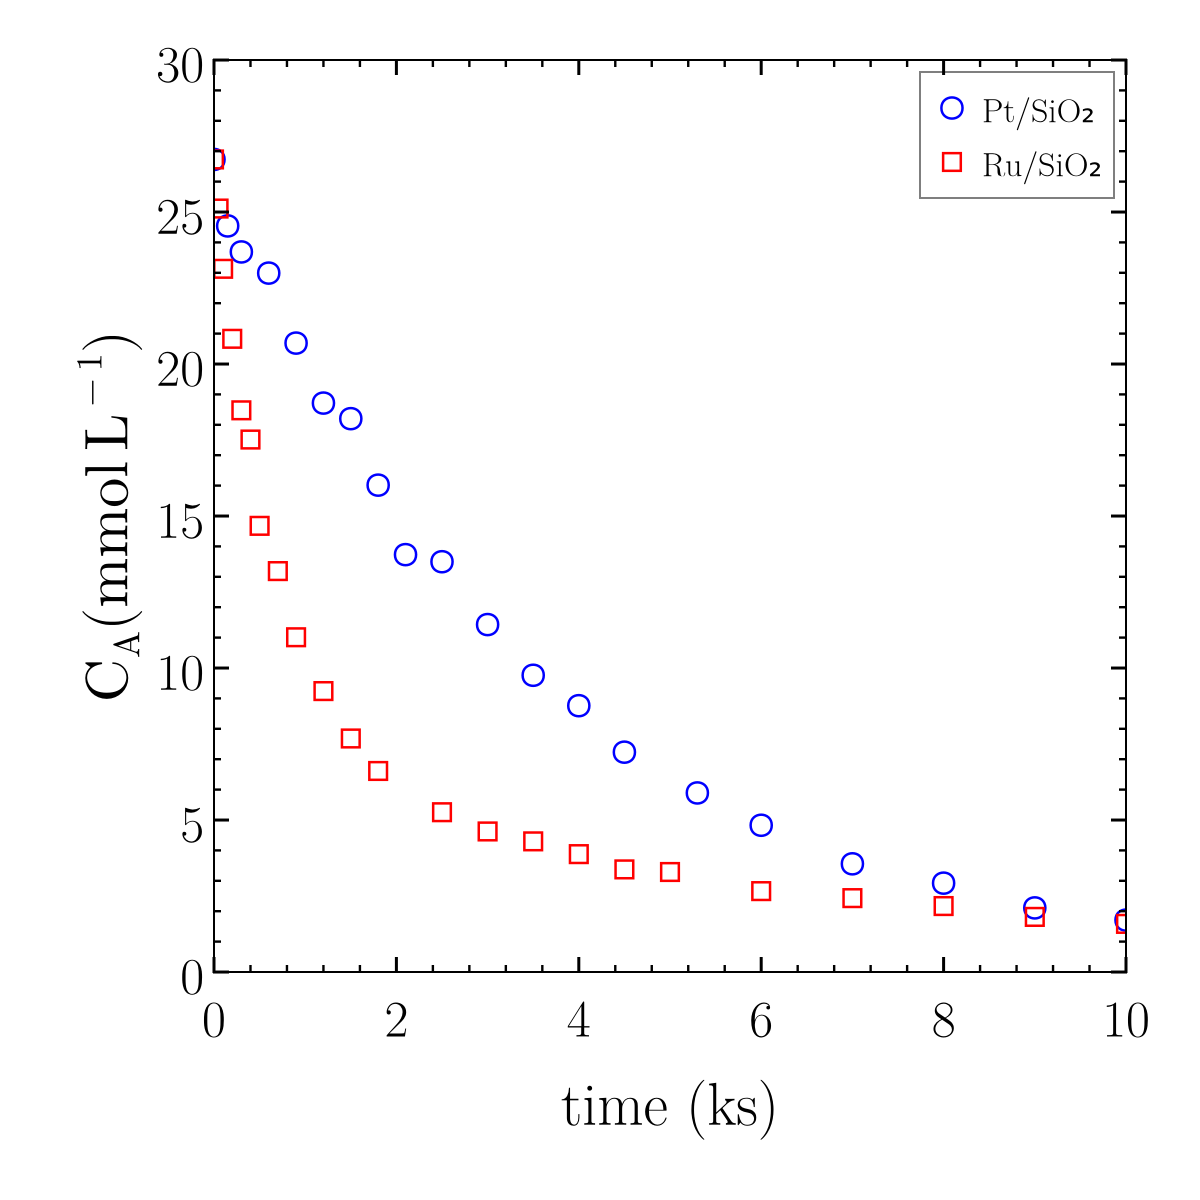

In [6]:
#######################################################
# This cell displays CA vs. time profiles             #
#######################################################

display(fig1);

### Applying a differential data analysis using appropriate scaling

We have suggested that a better analysis for heterogeneously catalyzed reactions would be one that carefully accounts for the system's extensive "size" in terms of the number of accessible active sites:

$$\frac{dN_A}{dt} = -r^{\prime \prime \prime}N_{S0}$$

With this material balance, one could define a turnover frequency using finite differences:

$$r^{\prime \prime \prime} = -\frac{1}{N_{S0}}\frac{\Delta N_A}{\Delta t} $$

This can be used to generate a table of reaction rates (turnover frequencies) at corresponding values of partial pressure, concentration, molar quantity, or thermodynamic activities. I'll use the latter here because we will see variations in reaction order, and by defining the "composition" driving force in terms of activities and our reaction rates in turnover frequency units (inverse time), we will always have a rate constant that has units of inverse time. With this in mind:

$$r^{\prime \prime \prime} = k{a_A}^\alpha$$

This can be linearized to estimate rate constants and reaction orders.

$$\ln{(r^{\prime \prime \prime})} = \ln{(k)} + \alpha \ln{({a_A})}$$

In [7]:
#######################################################################################
# Estimate turnover frequencies vs. aA for Pt/SiO2                                    #
#######################################################################################

dt1 = diff(t1)
dN1 = diff(NA1)
r1  = -1/NS0*dN1./dt1
Y1  = log10.(r1)
X1  = log10.(aA1[1:end-1])

#######################################################################################
# Estimate turnover frequencies vs. aA for Ru/SiO2                                    #
#######################################################################################

dt2 = diff(t2)
dN2 = diff(NA2)
r2  = -1/NS0*dN2./dt2
Y2  = log10.(r2)
X2  = log10.(aA2[1:end-1])


#######################################################################################
# Regress slope and intercept for Pt/SiO2 and Ru/SiO2                                 #
#######################################################################################

f1 = fit(X1, Y1, 1)
f2 = fit(X2, Y2, 1)
;

In [8]:
#######################################################################################
# Generate log-log graphs of turnover frequency vs. thermodynamic activity            #
#######################################################################################

set_theme!(theme_log)
fig2 = Figure(size = (600, 600))
ax1  = Axis(fig2[1,1])
ax2  = Axis(fig2[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (1e-2, 1e1)
xtick_vals = [0.01, 0.1, 1, 10]
ylim_vals  = (1e-2, 1e2)
ytick_vals = [0.01, 0.1, 1, 10, 100]
xscale_val = log10
yscale_val = log10

ax1.xlabel = L"\mathrm{a_A}"
ax1.ylabel = L"\mathrm{r^{\prime\prime\prime} \,(1/s)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

# ax1.xticks = xtick_vals
# # ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
# ax2.xticks = xtick_vals

# ax1.yticks = ytick_vals
# ax2.yticks = ytick_vals

scatter!(ax1, 10 .^X1, r1, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1.25, strokecolor = :blue, color = (:white, 0.0))
lines!(ax1, 10 .^X1, 10 .^f1.(X1), label = L"\alpha = 1.0", color = :black, linestyle = :dash, linewidth = 1.5)
scatter!(ax1, 10 .^X2, r2, label = "Ru/SiO₂", marker = :rect, markersize = 14, strokewidth = 1.25, strokecolor = :red, color = (:white, 0.0))
lines!(ax1, 10 .^X2, 10 .^f2.(X2), label = L"\alpha = 2.0", color = :black, linestyle = :dot, linewidth = 1.5)
axislegend(ax1, position = :lt, framevisible = true)

save("PtRuBatch2.svg", fig2)
CairoMakie.activate!(type = "svg")

Pt/SiO₂ has α = 1.04 and k =  2.4 1/s 


Ru/SiO₂ has α = 2.03 and k = 13.3 1/s

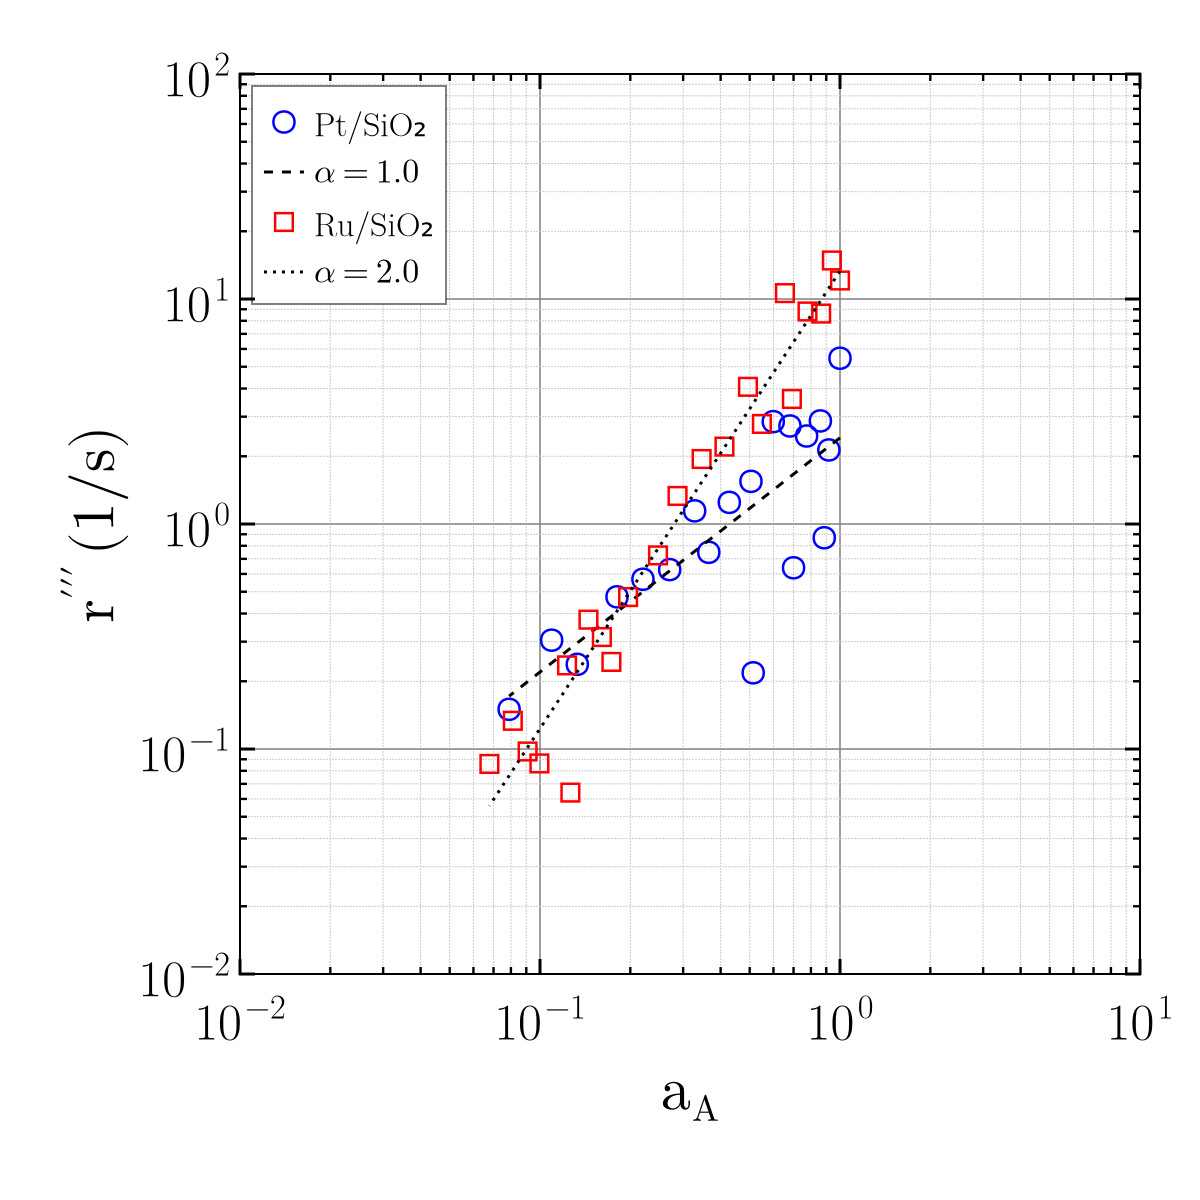

In [9]:
###########################################################################################
# Display regression results and log-log plot of rate vs. activity                        #
###########################################################################################

@printf("Pt/SiO₂ has α = %3.2f and k = %4.1f 1/s \n", f1[1], 10^f1[0])
@printf("Ru/SiO₂ has α = %3.2f and k = %3.1f 1/s", f2[1], 10^f2[0])
display(fig2);

### Results of Differential Analysis

Our data suggest that this reaction is first order over Pt/SiO2 and second order over Ru/SiO2, which is interesting. This result might point to fundamentally different mechanisms over the two metals; different rate determining steps within similar mechanisms; or different coverage regimes even with the same rate determining step. To move further, we apply integral analyses for first order kinetics and second order kinetics to both systems. This allows us to check goodness of fit and improve precision in rate constant estimation.

## Applying an Integral Analaysis to $\mathrm{Pt/SiO_2}$ and $\mathrm{Ru/SiO_2}$

### Linearized first order result with b = 0 (activity-based rate law, gas-phase reaction):

$$\ln{\left(\frac{N_A}{N_{A0}}\right)} = -\frac{P}{P^\circ}\frac{N_{S0}}{N_{T0}}t$$

### Linearized second order result with b = 0 (activity-based rate law, gas-phase reaction):

$$\frac{1}{N_A} - \frac{1}{N_{A0}} = -k\frac{N_{S0}}{{N_{T0}}^2}\left(\frac{P}{P^\circ}\right)^2t$$

In [10]:
##############################################################
# Regression analysis to estimate first order rate constants #
##############################################################

# For Pt/SiO2
X3  = t1
Y3  = log.(NA1/NA0)
m3  = transpose(X3)*X3\transpose(X3)*Y3
k3  = -P0/P*NT0/NS0*m3

# For Ru/SiO2
X4 = t2
Y4 = log.(NA2/NA0)
m4 = transpose(X4)*X4\transpose(X4)*Y4
k4 = -P0/P*NT0/NS0*m4
;

In [11]:
##################################################################
# First order linearization and lines of best fit for Pt and Ru  #
##################################################################

set_theme!(theme_linear)
fig3 = Figure(size = (600, 600))
ax1  = Axis(fig3[1,1])
ax2  = Axis(fig3[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (-3, 0)
ytick_vals = collect(-3:1:0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{\ln{\left(N_A/N_{A0}\right)}}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
#ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, X3/1000, Y3, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white,0.0))
lines!(ax1, X3/1000, X3*m3, label = "k = 2.8 1/s", color = :blue, linestyle = :dash, linewidth = 1.5)
scatter!(ax1, X4/1000, Y4, label = "Ru/SiO₂", marker = :rect, markersize = 14, strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
lines!(ax1, X4/1000, X4*m4, label = "k = 3.6 1/s", color = :red, linestyle = :dash, linewidth = 1.5)
axislegend(ax1, position = :rt, framevisible = true)

save("PtRuBatch3.svg", fig3)
CairoMakie.activate!(type = "svg")

For first order kinetics, Pt/SiO₂ has k = 2.8 1/s 
For first order kinetics, Ru/SiO₂ has k = 3.6 1/s

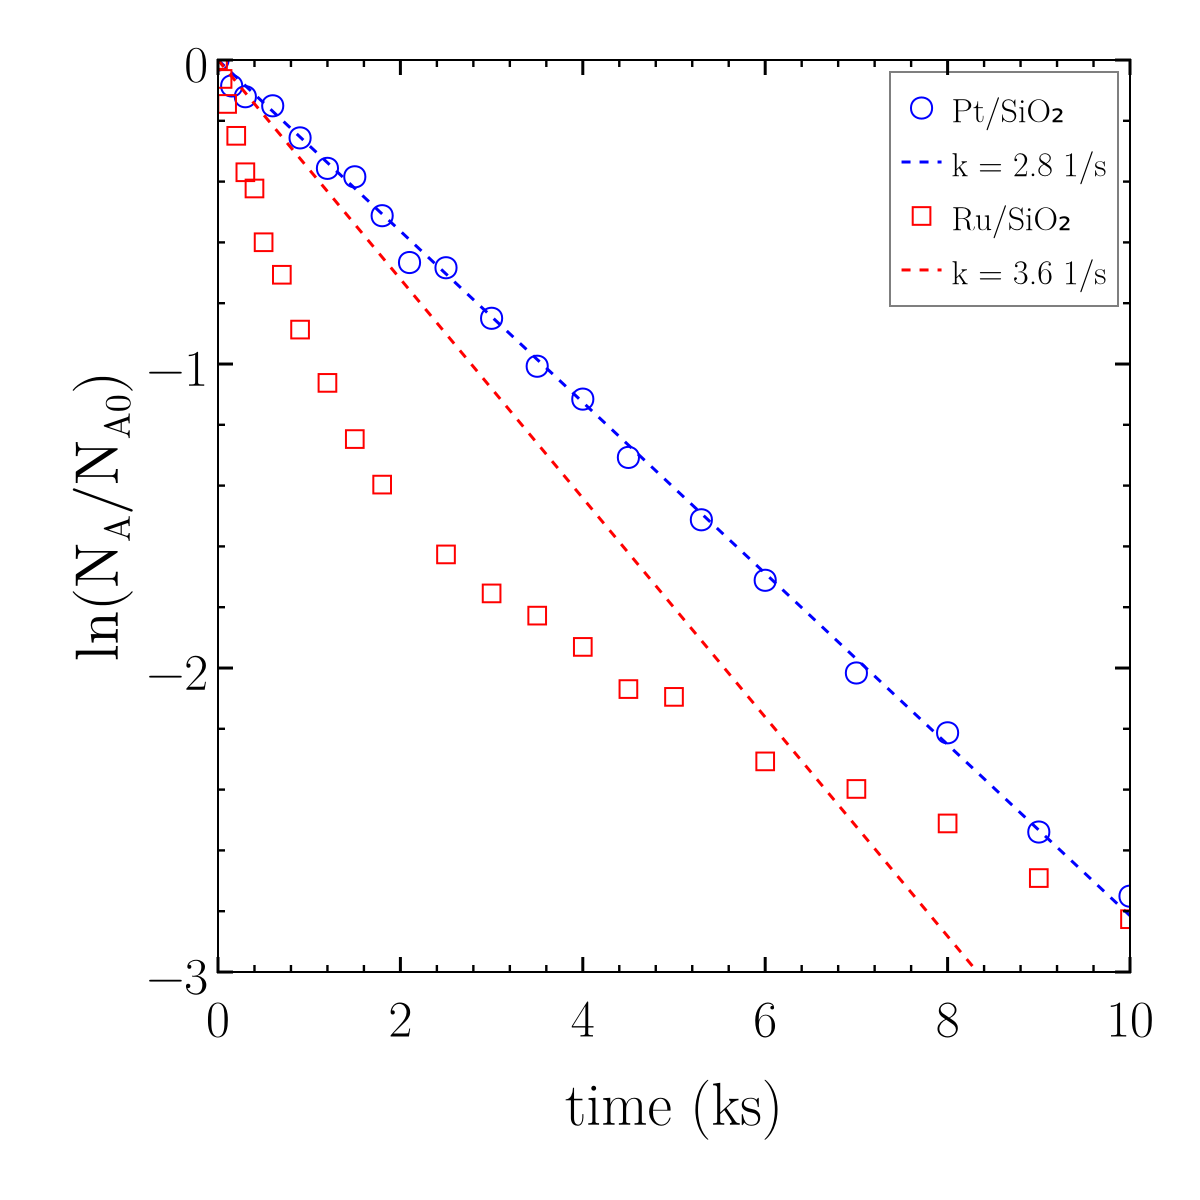

CairoMakie.Screen{IMAGE}


In [12]:
#######################################################################
# Display Regression results and figure                               #
#######################################################################

@printf("For first order kinetics, Pt/SiO₂ has k = %3.1f 1/s \n", k3)
@printf("For first order kinetics, Ru/SiO₂ has k = %3.1f 1/s", k4)
display(fig3)

In [13]:
###############################################################
# Regression analysis to estimate second order rate constants #
###############################################################

# For Pt/SiO2
X5  = t1
Y5  = 1 ./(NA1) .- 1 ./NA0
m5  = transpose(X5)*X5\transpose(X5)*Y5
k5  = m5*NT0^2/NS0*P0^2/P^2

#For Ru/SiO2
X6 = t2
Y6 = 1 ./(NA2) .- 1 ./NA0
m6  = transpose(X6)*X6\transpose(X6)*Y6
k6 = m6*NT0^2/NS0*P0^2/P^2
;

In [14]:
##################################################################
# 2nd order linearization and lines of best fit for Pt and Ru    #
##################################################################

fig4 = Figure(size = (600, 600))
ax1  = Axis(fig4[1,1])
ax2  = Axis(fig4[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 1.25)
ytick_vals = collect(0:0.25:1.25)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{\left(1/N_A - 1/N_{A0}\right)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
#ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals


scatter!(ax1, X5/1000, Y5, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white, 0.0))
lines!(ax1, X5/1000, X5*m5, label = "k = 10.3 1/s", color = :black, linestyle = :dash, linewidth = 1.5)
scatter!(ax1, X6/1000, Y6, label = "Ru/SiO₂", marker = :rect, markersize = 15, strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
lines!(ax1, X6/1000, X6*m6, label = "k = 15.1 1/s", color = :black, linestyle = :dot, linewidth = 1.5)
axislegend(ax1, position = :lt, framevisible = true)
save("PtRuBatch4.svg", fig4)

CairoMakie.activate!(type = "svg")

For second order kinetics, Pt/SiO₂ has k = 10.3 1/s 
For second order kinetics, Ru/SiO₂ has k = 15.1 1/s

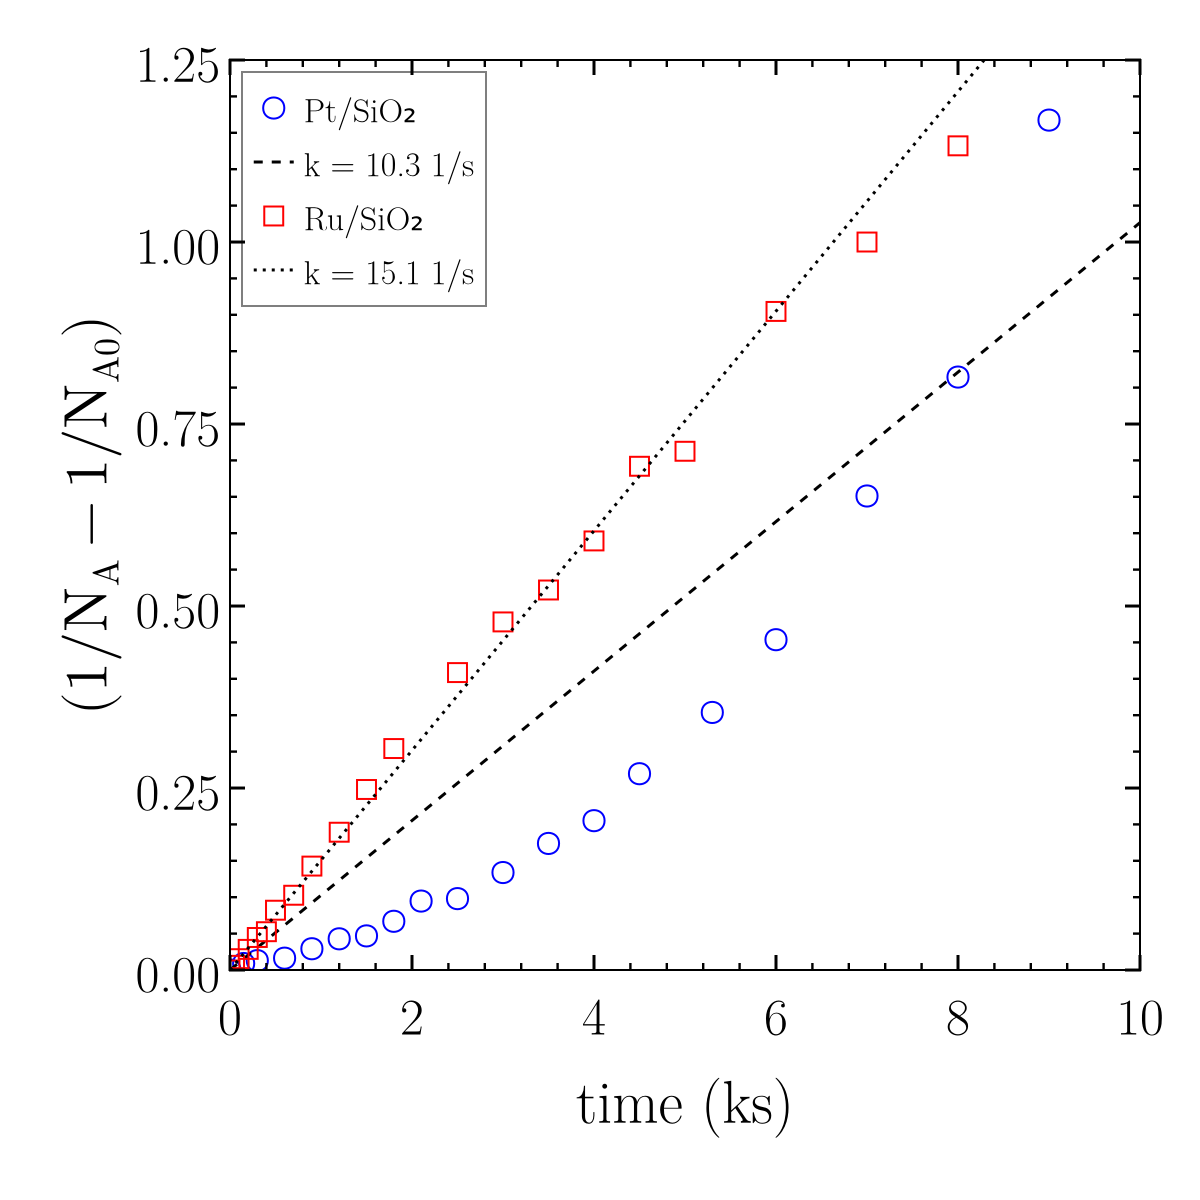

In [15]:
#######################################################################
# Display Regression results and figure                               #
#######################################################################

@printf("For second order kinetics, Pt/SiO₂ has k = %3.1f 1/s \n", k5)
@printf("For second order kinetics, Ru/SiO₂ has k = %3.1f 1/s", k6)
display(fig4);

## Consider temperature effects

We now are relatively confident that we are seeing first order kinetics for Pt and second order kinetics for Ru. Further, it seems that Ru is considerably more active than Pt for this reaction. A logical next step might now be to repeat these reactions at multiple temperatures. Generally speaking, this will allow us to extract barriers, which can often provide insight into elementary phenomena and help us to understand why we see differences between these two catalysts.

We performed the first and second order linearizations at each temperature, and we now have a set of rate constants for Pt and Ru at various reaction temperatures. These are stored in a .csv file and loaded in the cell below.

In [16]:
#######################################################################################
# Load 1st (Pt) and 2nd (Ru) order rate constants estimated at different temperatures #
#######################################################################################

k, HEADER = readdlm("BR02C.csv", ',', Any, '\n', header = true)
k = Float64.(k)

T  = k[:, 1]
k1 = k[:, 2]
k2 = k[:, 3]
;

### Estimating barriers and pre-exponentials

With rate constants estimated at various temperatures, one can perform the usual Arrhenius-type analysis to estimate barriers, pre-exponentials, entropies of activation, etc.

In [17]:
########################################################################## 
# Regress slope and intercept for Arrhenius linearization, ln(k) vs. 1/T #
##########################################################################

f3 = fit(1000 ./T, log.(k1), 1)
f4 = fit(1000 ./T, log.(k2), 1)

A1  = exp(f3[0])
EA1 = -8.314*f3[1]
A2  = exp(f4[0])
EA2 = -8.314*f4[1]
;

In [18]:
##########################################################################
# Generate Arrhenius plots for Pt/SiO2 and Ru/SiO2                       #
##########################################################################

fig5 = Figure(size = (600, 600))
ax1  = Axis(fig5[1,1])
ax2  = Axis(fig5[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (1.25, 2.75)
xtick_vals = collect(1.25:0.25:2.75)
ylim_vals  = (-3.0, 9)
ytick_vals = (-3.:2.:9., string.(round.(-3.:2.:9., digits = 3)))
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{1000/T (K^{-1})}"
ax1.ylabel = L"\mathrm{\ln(k)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
#ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, 1000 ./T, log.(k1), label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white, 0.0))
lines!(ax1, 1000 ./T, f3.(1000 ./T), label = L"E_A \approx 90 \, \mathrm{kJ \, mol^{-1}}", color = :black, linestyle = :dash, linewidth = 1.5)
scatter!(ax1, 1000 ./T, log.(k2), label = "Ru/SiO₂", marker = :rect, markersize = 14, strokewidth = 1, strokecolor = :red, color = :white)
lines!(ax1, 1000 ./T, f4.(1000 ./T), label = L"E_A \approx 69 \, \mathrm{kJ \, mol^{-1}}", color = :black, linestyle = :dot, linewidth = 1.5)
axislegend(ax1, position = :rt, framevisible = true)
save("PtRuBatch5.svg", fig5)
CairoMakie.activate!(type = "svg")

Pt/SiO₂ has a pre-exponential of 8.8E+10 1/s and a barrier of 90.4 kJ/mol 
Ru/SiO₂ has a pre-exponential of 1.2E+09 1/s and a barrier of 68.8 kJ/mol

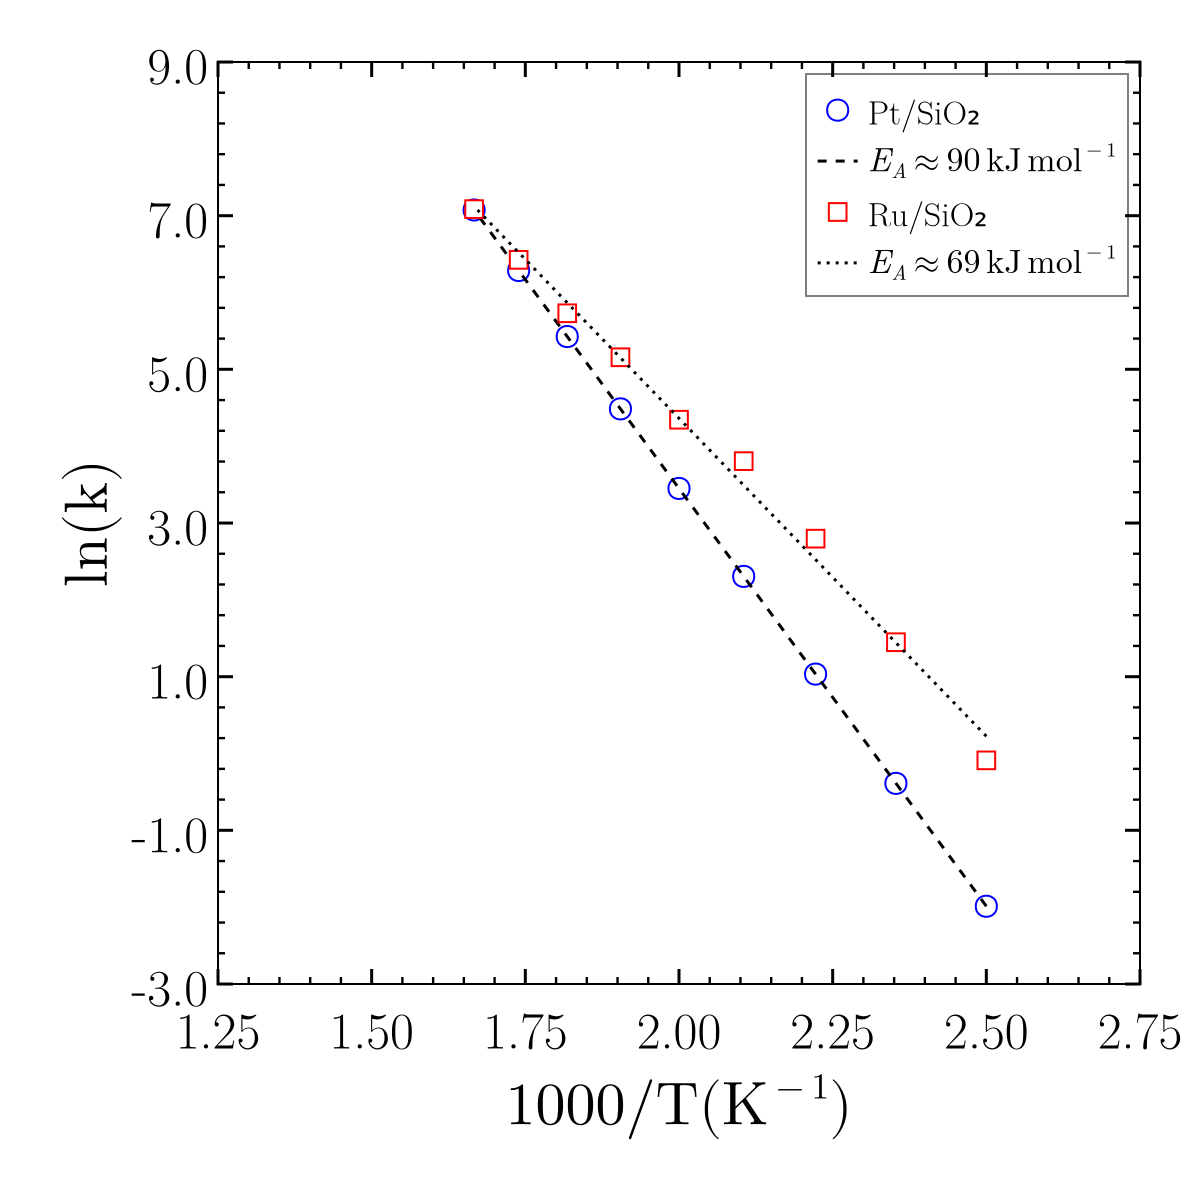

In [19]:
###########################################################################
# Display regressed A, EA, and figure                                     #
###########################################################################

@printf("Pt/SiO₂ has a pre-exponential of %3.1E 1/s and a barrier of %3.1f kJ/mol \n", A1, EA1)
@printf("Ru/SiO₂ has a pre-exponential of %3.1E 1/s and a barrier of %3.1f kJ/mol", A2, EA2)
display(fig5);

## Reproducibility

It is ***always*** a good idea to run replicates in catalytic reactors.  One can imagine two types of replicates.  In the first, one might clean the reactor, load it with a fresh charge of catalyst and reacting species, and perform the experiment a second time.  This would give us some idea of the level of reproducibility and precision we have each time we attempt to perform an indentical experiment, which is surprisingly difficult. Small variations in catalyst mass (it is hard to precisely measure out mg quantities of catalyst), temperature, and startup procedure can produce large variations in the data that we observe. We will not consider this type of replicate here.

A second, useful type of replicate involves attempting to repeating the experiment with the spent catalyst. This allows us to test for any type of evolution in the catalyst over the course of the reaction. For example, a catalyst may well deactivate under reaction conditions, which would influence our observations and perhaps confound our interpretation of reaction kinetics.

Below, we illustrate four replicates over our $\mathrm{Pt/SiO_2}$ catalyst.

In [20]:
########################################################################
# This cell loads replicate experiments for the spent Pt/SiO2 catalyst #
########################################################################

DATA3 = load_object("BR02D")
t3    = DATA3["t"]
t3a   = DATA3["ta"]
NA3   = DATA3["NA"]
CA3   = DATA3["CA"]
aA3   = DATA3["aA"]
;

In [21]:
########################################################################
# Generate graph of replicates for Pt/SiO2                             #
########################################################################

set_theme!(theme_linear)
fig6 = Figure(size = (600, 600))
ax1  = Axis(fig6[1,1])
ax2  = Axis(fig6[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 50)
xtick_vals = collect(0:10:50)
ylim_vals  = (0, 0.03)
ytick_vals = collect(0:0.005:0.03)
xscale_val = identity
yscale_val = identity

# ax1.title = "Pt/SiO₂ Replicates"

ax1.xlabel = L"\mathrm{t (ks)}"
ax1.ylabel = L"\mathrm{C_A \,(mol \, L^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

# #Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
# ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

for j = 1:4
    scatter!(ax1, t3a[:, j]/1000, CA3[:, j], label = string("Exp. ", j), cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
end
    axislegend(ax1, position = :rt, framevisible = true)
save("PtBatchReps.svg", fig6)
CairoMakie.activate!(type = "svg")

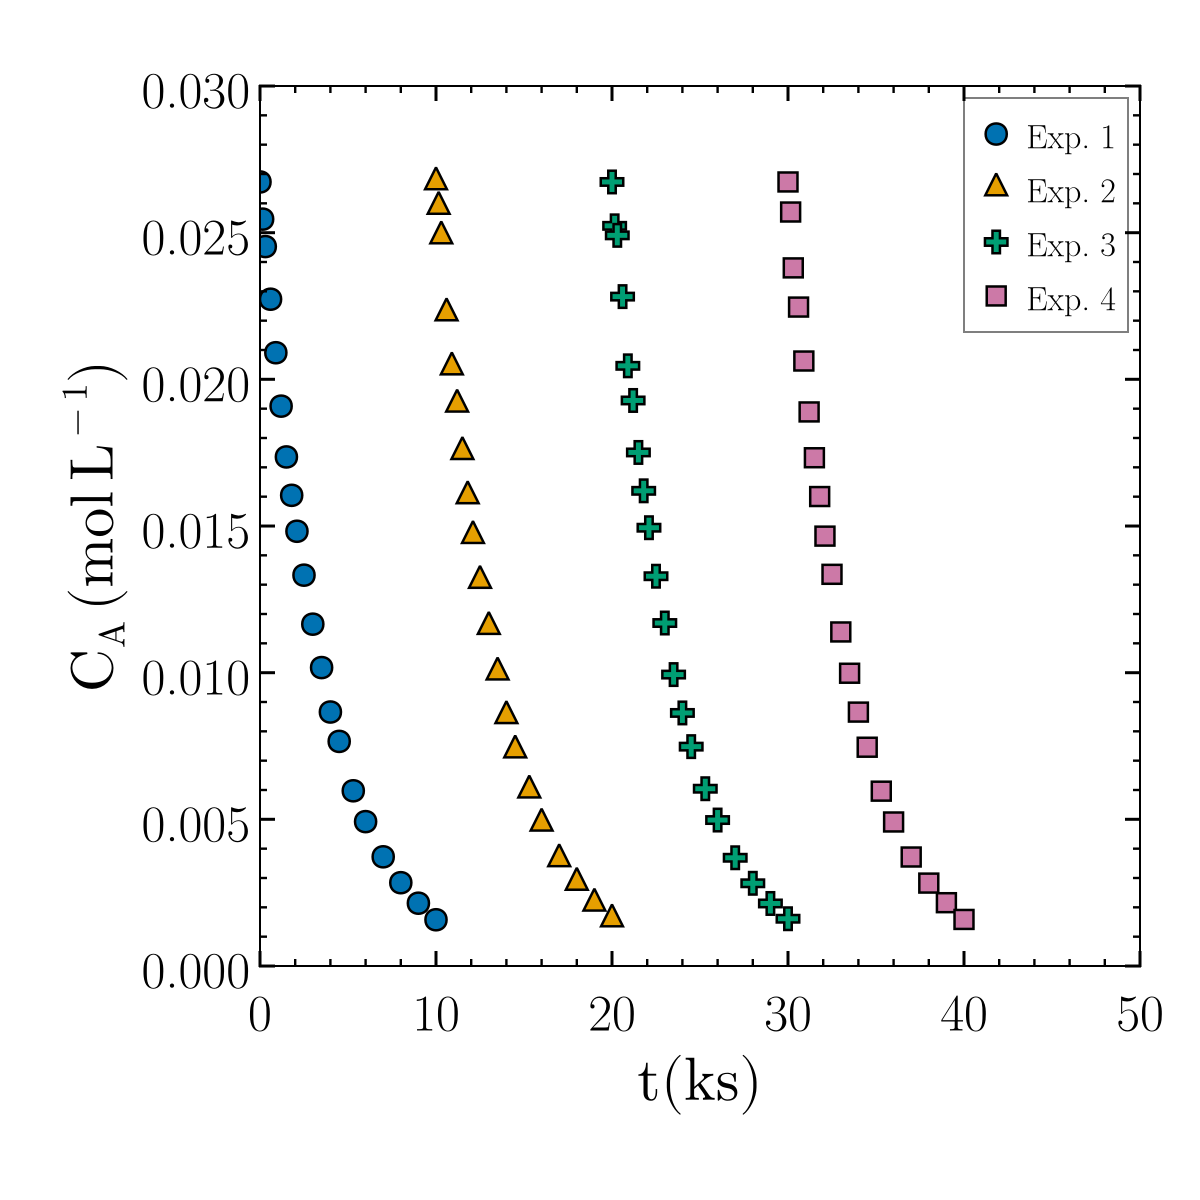

In [22]:
########################################################################
# Display graph of replicates for Pt/SiO2                              #
########################################################################

display(fig6);

### Interpreting replicates for $\mathrm{Pt/SiO_2}$

We observe nearly identical $C_A$ vs. $t$ profiles, suggesting that the catalyst structure and its active sites are not significantly altered (at least, not in a kinetically relevant way) over the course of the batch run. We can repeat the differential and/or integral analyses to estimate rate constants and barriers as usual, and we find little variation for this catalyst. This suggests that it is stable and that our initial active site count, $N_{S0}$, likely remains a good estimate for the active site density throughout the course of any one reaction and throughout all of our replicates.

In [23]:
#######################################################
# Differential analysis of each replicate             #
#######################################################

dt3 = diff(t3, dims = 1)
dN3 = diff(NA3, dims = 1)
r3e = -1/NS0*dN3./dt3
Y3  = log10.(r3e)
X3  = log10.(aA3[1:end-1,:])

f3 = Dict()

for j = 1:4
    f3[j] = fit(X3[:, j], Y3[:, j], 1)
end

f3
f3r = fit(vec(X3), vec(Y3), 1)
;

In [24]:
####################################################################
# log-log plot of differential analysis results for each replicate #
####################################################################

set_theme!(theme_log)
fig7 = Figure(size = (600, 600))
ax1  = Axis(fig7[1,1])
ax2  = Axis(fig7[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (1e-2, 1e1)
xtick_vals = [0.01, 0.1, 1, 10]
ylim_vals  = (1e-2, 1e1)
ytick_vals = [0.01, 0.1, 1, 10]
xscale_val = log10
yscale_val = log10

# ax1.title  = "Pt/SiO₂ Replicates"
ax1.xlabel = L"\mathrm{a_A}"
ax1.ylabel = L"\mathrm{r^{\prime\prime\prime} \,(1/s)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

# ax1.xticks = xtick_vals
# # ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
# ax2.xticks = xtick_vals

# ax1.yticks = ytick_vals
# ax2.yticks = ytick_vals

for j = 1:4
    scatter!(ax1, 10 .^X3[:, j], r3e[:, j], label = string("Exp. ", j), cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
end
    lines!(ax1, 10 .^[minimum(X3), maximum(X3)], 10 .^f3r.([minimum(X3), maximum(X3)]), color = :black, linestyle = :dash, linewidth = 1.5)
    axislegend(ax1, position = :lt, framevisible = true)

CairoMakie.activate!(type = "svg")

In experiment 1, we get α = 1.04 and k = 2.70E+00 1/s 
In experiment 2, we get α = 1.04 and k = 2.68E+00 1/s 
In experiment 3, we get α = 0.99 and k = 2.48E+00 1/s 
In experiment 4, we get α = 1.06 and k = 2.78E+00 1/s 


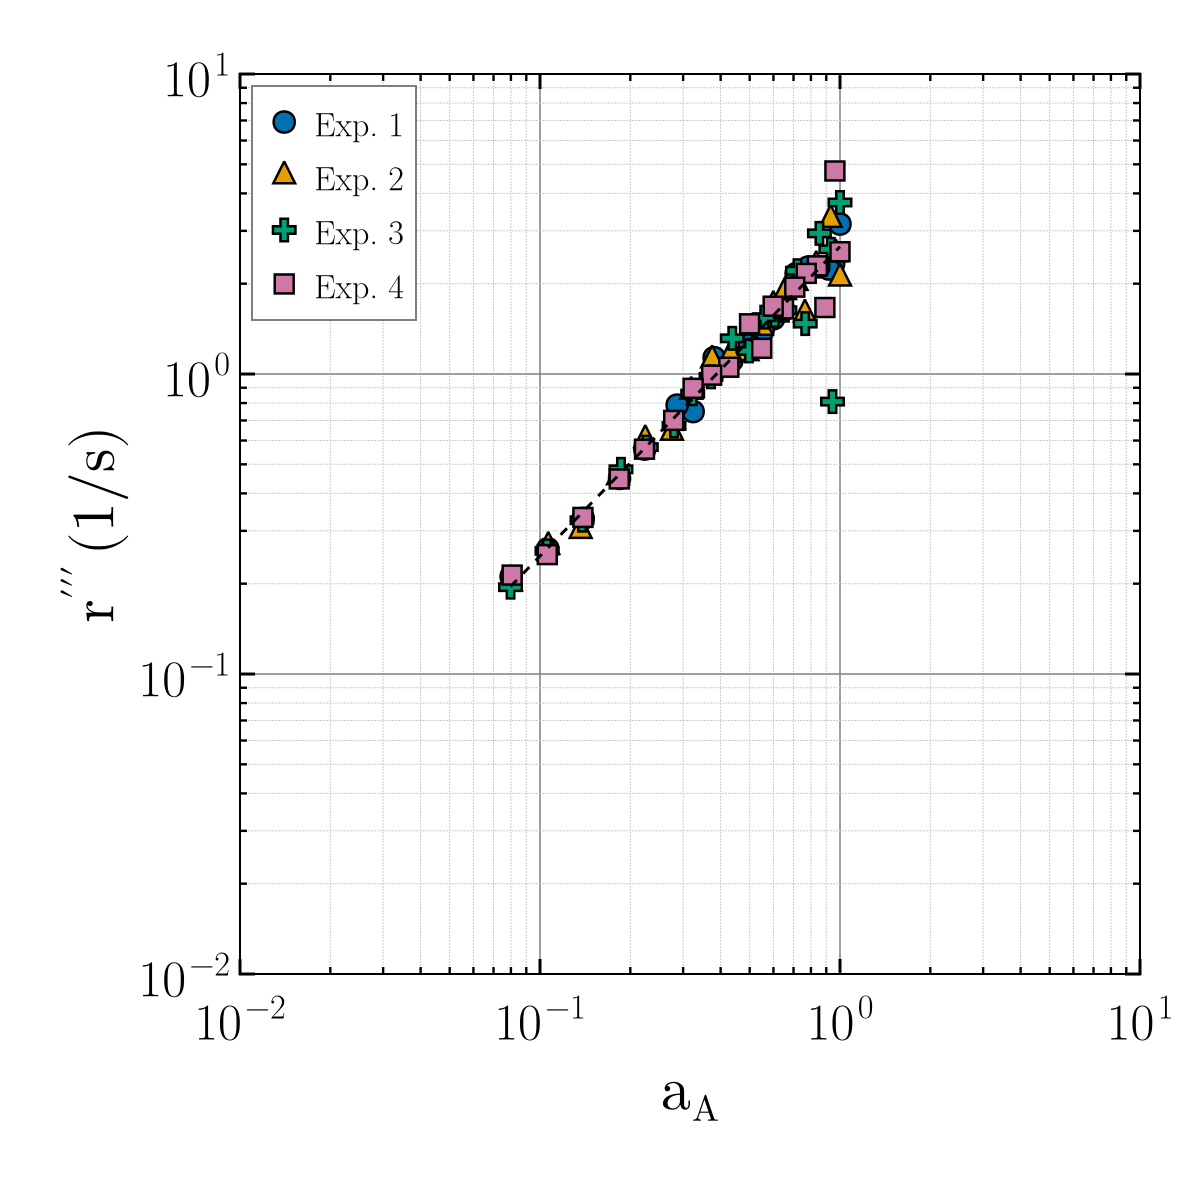

In [25]:
#######################################################################
# Display regression results and graph for each differential analysis #
#######################################################################

for j = 1:4
    @printf("In experiment %d, we get α = %3.2f and k = %3.2E 1/s \n", j, f3[j][1], 10^f3[j][0])
end

display(fig7);

Because each run shows similar behavior, we can treat this as one large data set and regress a single mean rate constant that does a pretty good job of describing kinetics.

In [26]:
#########################################################
# Treat all data as a single set, regress rate constant #
#########################################################

mavg  = vec(t3)\vec(log.(NA3/NA3[1,1]))
k1avg = -mavg*NT0/NS0*P0/P
;

In [27]:
#########################################################
# Generate linearized plot of all data for Pt/SiO2      #
#########################################################

set_theme!(theme_linear)
fig8 = Figure(size = (600, 600))
ax1  = Axis(fig8[1,1])
ax2  = Axis(fig8[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (-3, 0)
ytick_vals = collect(-3:0.5:0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t (ks)}"
ax1.ylabel = L"\ln{\left(\mathrm{N_A/N_{A0}} \right)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

# #Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
# ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals


for j = 1:4
    scatter!(ax1, t3[:, j]/1000, log.(NA3[:, j]/NA3[1, j]), label = string("Exp. ", j), cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
end
    lines!(ax1, t3[:, 1]/1000, mavg*t3[:, 1], label = "k = 2.8 1/s", color = :black, linestyle = :dash, linewidth = 1.5)
    axislegend(ax1, position = :rt, framevisible = true)
save("PtRepsReg.svg", fig8)

CairoMakie.activate!(type = "svg")

Regressing all data gives a first order rate constant of 2.82 1/s


The true rate constant at 450K constant is 2.8 1/s

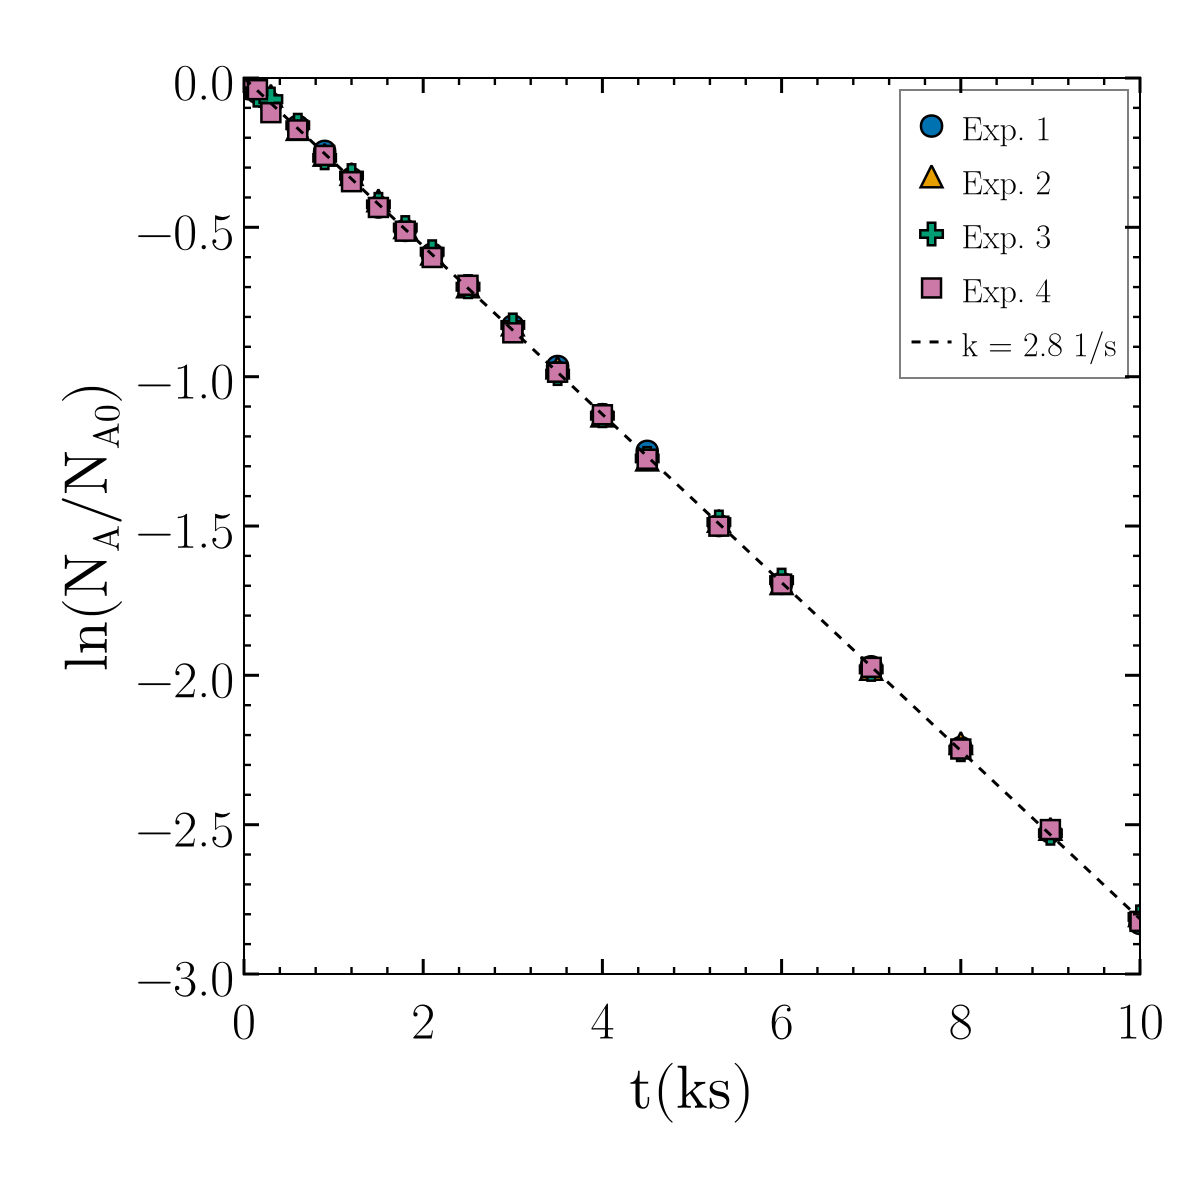

In [28]:
###############################################################
# Display regression results and figure                       #
###############################################################

@printf("Regressing all data gives a first order rate constant of %3.2f 1/s", k1avg)
@printf("\nThe true rate constant at 450K constant is 2.8 1/s")
display(fig8);

## Replicates over $\mathrm{Ru/SiO_2}$

Next we load replicates performed over $\mathrm{Ru/SiO_2}$, where we observe significant differences between each run. This suggests that the catalyst deactivates over the course of each run, which means that our initial estimate of the active site count, $N_{S0}$, is only really relevant at $t = 0$, and it becomes a less relevant descriptor as time and batch cycles progress. This likely means that our conclusions about the 2nd order reaction and the barriers based on that analysis are incorrect as they are influenced by catalyst deactivation.

In [29]:
###############################################
# Load replicates                             #
###############################################

DATA4 = load_object("BR02E")
t4   = DATA4["t"]
t4a  = DATA4["ta"]
NA4  = DATA4["NA"]
CA4  = DATA4["CA"]
aA4  = DATA4["aA"]
NS4  = DATA4["NS"]
sims = size(t4, 2)
;

In [30]:
###########################################################
# Graph experimental CA vs. t profiles for each repliate  #
###########################################################

set_theme!(theme_linear)
fig9 = Figure(size = (600, 600))
ax1  = Axis(fig9[1,1])
ax2  = Axis(fig9[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 0.03)
ytick_vals = collect(0:0.005:0.03)
xscale_val = identity
yscale_val = identity

# ax1.title = "Ru/SiO₂ Replicates"
ax1.xlabel = L"\mathrm{t (ks)}"
ax1.ylabel = L"\mathrm{C_A \,(mol \, L^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

# #Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

for j = 1:sims
    scatter!(ax1, t4a[:, j]/1000, CA4[:, j], label = string("Exp. ", j), cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.0)
end
    axislegend(ax1, position = :rb, framevisible = true)
save("RuBatchReps.svg", fig9)
CairoMakie.activate!(type = "svg")
;

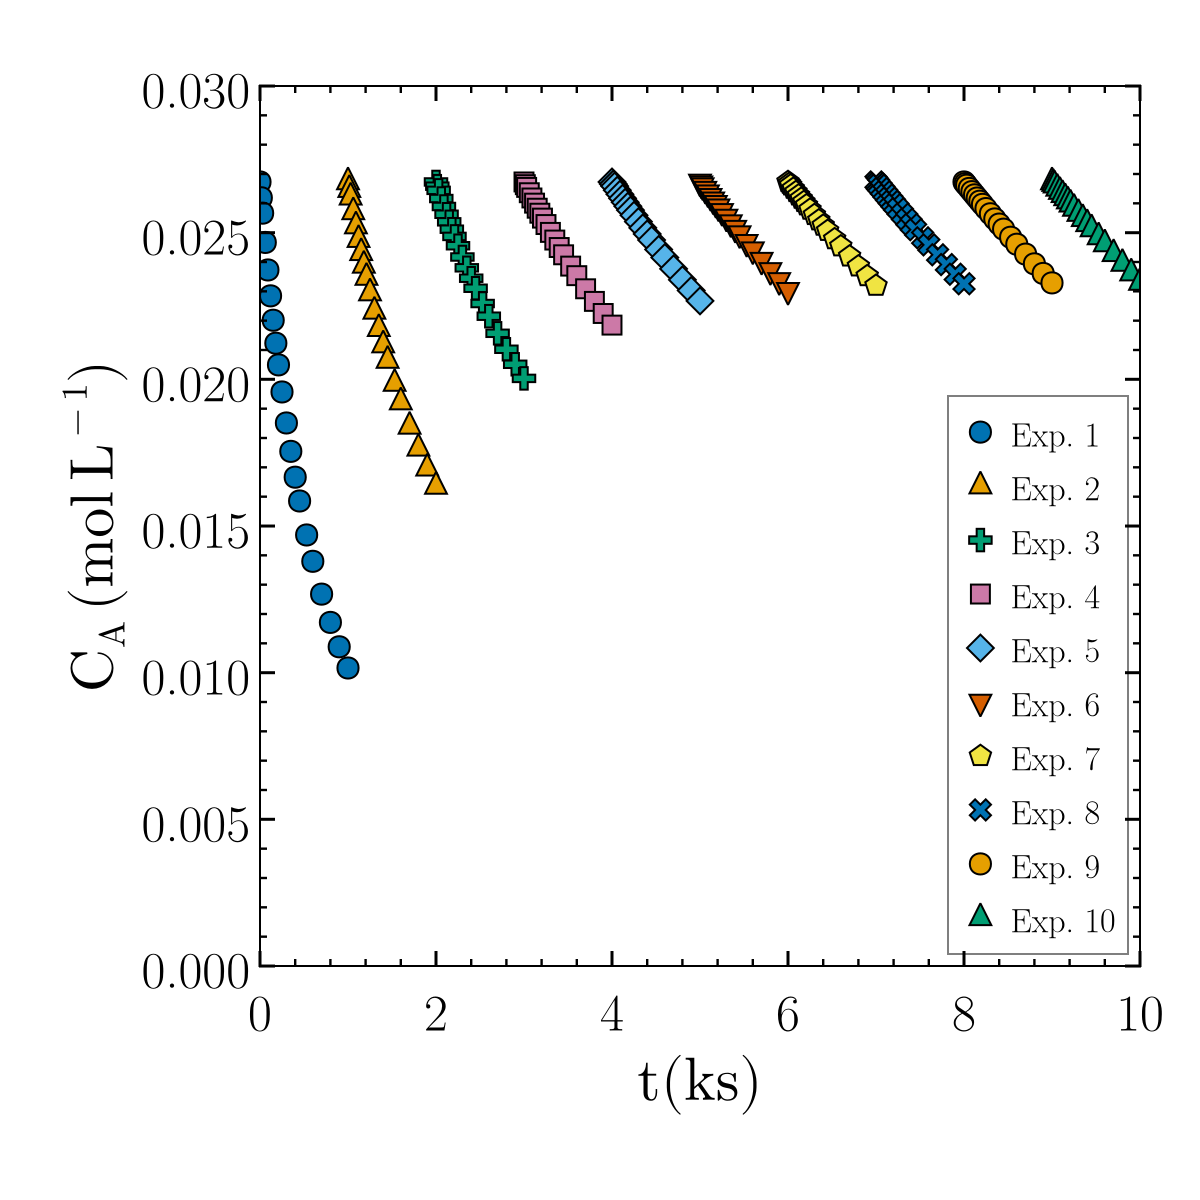

In [31]:
############################################
# Display Ru/SiO2 replicates               #
############################################

display(fig9);

### Some observations

We can see that the catalyst does not begin to behave reproducibly until the 7th or 8th replicate. Until that point, the catalyst appears to become less active with each run. This suggests that Ru/SiO2 undergoes some type of deactivation (sintering, coke deposition, poisoning, oxidation, etc.) upon exposure to reaction conditions. The tricky part is that this deactivation causes a time-dependent change in the "extensive activity" of the Ru catalyst (the number of sites participating in the reaction is probably decreasing, or each site is somehow becoming less active with time). It is impossible for us to resolve this deactivation from the regular time domain change in CA from a single experiment.

In [32]:
####################################################
# Perform differential analysis for Ru replicates  #
####################################################

dt4 = diff(t4, dims = 1)
dN4 = diff(NA4, dims = 1)
r4e = -1/NS0*dN4./dt4
Y4  = log10.(r4e)
X4  = zeros(size(r4e, 1), sims)

for i = 1:size(X4, 1)
    for j = 1:size(X4, 2)
        X4[i, j] = log10((aA4[i, j]+aA4[i+1, j])/2)
    end
end

f4  = Dict()
m4  = zeros(sims)

###############################################
# Perform integral analysis for Ru replicates #
###############################################

for j = 1:sims
    f4[j]  = fit(X4[:, j], Y4[:, j], 1)
    m4[j] = t4[:, j]\log.(NA4[:, j]/NA4[1, j]) 
end

k4 = -1*m4*NT0/NS4[end, end]*P0/P;

In [33]:
#################################################################
# Generate log-log plot of differential analysis results for Ru #
#################################################################


set_theme!(theme_log)
fig10 = Figure(size = (600, 600))
ax1  = Axis(fig10[1,1])
ax2  = Axis(fig10[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (10^-0.5, 10^0.25)
#xtick_vals = [0.1, 1, 10]
ylim_vals  = (1e0, 10^1.5)
#ytick_vals = [1, 10]
xscale_val = log10
yscale_val = log10

ax1.title  = "Ru/SiO₂ Replicates"
ax1.xlabel = L"\mathrm{a_A}"
ax1.ylabel = L"\mathrm{r^{\prime\prime\prime} \,(1/s)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

# ax1.xticks = xtick_vals
# # ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
# ax2.xticks = xtick_vals

# ax1.yticks = ytick_vals
# ax2.yticks = ytick_vals

for j = 1:sims
    scatter!(ax1, 10 .^X4[:, j], r4e[:, j], label = string("Exp. ", j), cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokecolor = :black, strokewidth = 1.0)
    lines!(ax1, 10 .^X4[:, j], 10 .^f4[j].(X4[:, j]), color = :black, linestyle = :dash, linewidth = 1.5)
end
    
    axislegend(ax1, position = :rt, framevisible = true)

CairoMakie.activate!(type = "svg")
;

In experiment 1, we get α = 1.73 and k = 1.40E+01 1/s 
In experiment 2, we get α = 2.21 and k = 6.72E+00 1/s 
In experiment 3, we get α = 2.53 and k = 3.62E+00 1/s 
In experiment 4, we get α = 2.36 and k = 2.32E+00 1/s 
In experiment 5, we get α = 1.88 and k = 1.77E+00 1/s 
In experiment 6, we get α = 1.46 and k = 1.54E+00 1/s 
In experiment 7, we get α = 1.22 and k = 1.44E+00 1/s 
In experiment 8, we get α = 1.10 and k = 1.40E+00 1/s 
In experiment 9, we get α = 1.04 and k = 1.38E+00 1/s 
In experiment 10, we get α = 1.02 and k = 1.37E+00 1/s 


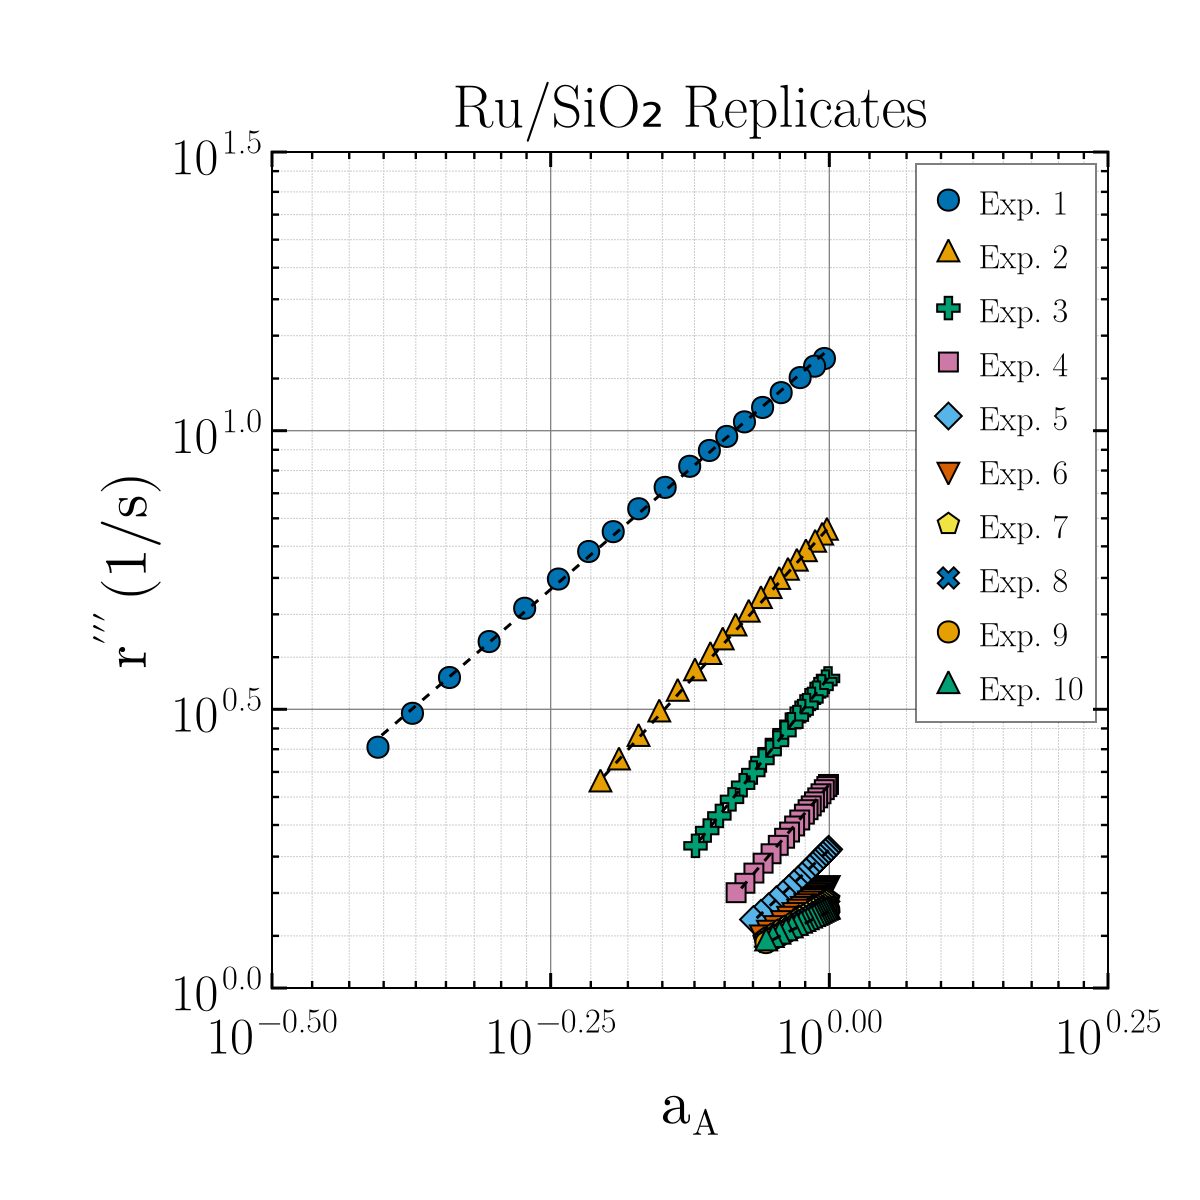

In [34]:
########################################################
# Display regression results and figure                #
########################################################

for j = 1:sims
    @printf("In experiment %d, we get α = %3.2f and k = %3.2E 1/s \n", j, f4[j][1], 10^f4[j][0])
end
display(fig10);

In [35]:
#############################################################
# Generate first order linearization plot for Ru replicates #
#############################################################

set_theme!(theme_linear)
fig11 = Figure(size = (600, 600))
ax1  = Axis(fig11[1,1])
ax2  = Axis(fig11[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 1)
xtick_vals = collect(0:0.25:1)
ylim_vals  = (-1.0, 0)
ytick_vals = collect(-1.0:0.25:0)
xscale_val = identity
yscale_val = identity

# ax1.title  = "Ru/SiO₂ Replicates"
ax1.xlabel = L"\mathrm{t (ks)}"
ax1.ylabel = L"\ln{\left(\mathrm{N_A/N_{A0}} \right)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

# #Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
# ax1.xtickformat = value -> [LaTeXString("10^$value") for value in ["0.01", "0.1", "1", "10"]]
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

for j = 1:sims
    scatter!(ax1, t4[:, j]/1000, log.(NA4[:, j]/NA4[1, j]), label = string("Exp. ", j), cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.0, strokecolor = :black)
    lines!(ax1, t4[:, j]/1000, m4[j]*t4[:, j], color = :black, linestyle = :dash, linewidth = 1.5)
end
axislegend(ax1, position = :lb, framevisible = true)
save("RuRepsReg.svg", fig11)
CairoMakie.activate!(type = "svg")
;

In experiment 1, we get k = 1.06E+02 1/s 
In experiment 2, we get k = 5.29E+01 1/s 
In experiment 3, we get k = 3.04E+01 1/s 
In experiment 4, we get k = 2.08E+01 1/s 
In experiment 5, we get k = 1.67E+01 1/s 
In experiment 6, we get k = 1.50E+01 1/s 
In experiment 7, we get k = 1.42E+01 1/s 
In experiment 8, we get k = 1.39E+01 1/s 
In experiment 9, we get k = 1.38E+01 1/s 
In experiment 10, we get k = 1.37E+01 1/s 
First α ≈ 2.0, EA ≈ 70 kJ/mol, A ≈ 1x10^9  s⁻¹, and k ≈ 13.3 s⁻¹
True  α ≈ 1.0, EA ≈ 90 kJ/mol, A ≈ 2.5x10^11 s⁻¹, and k ≈ 13.7 s⁻¹ 


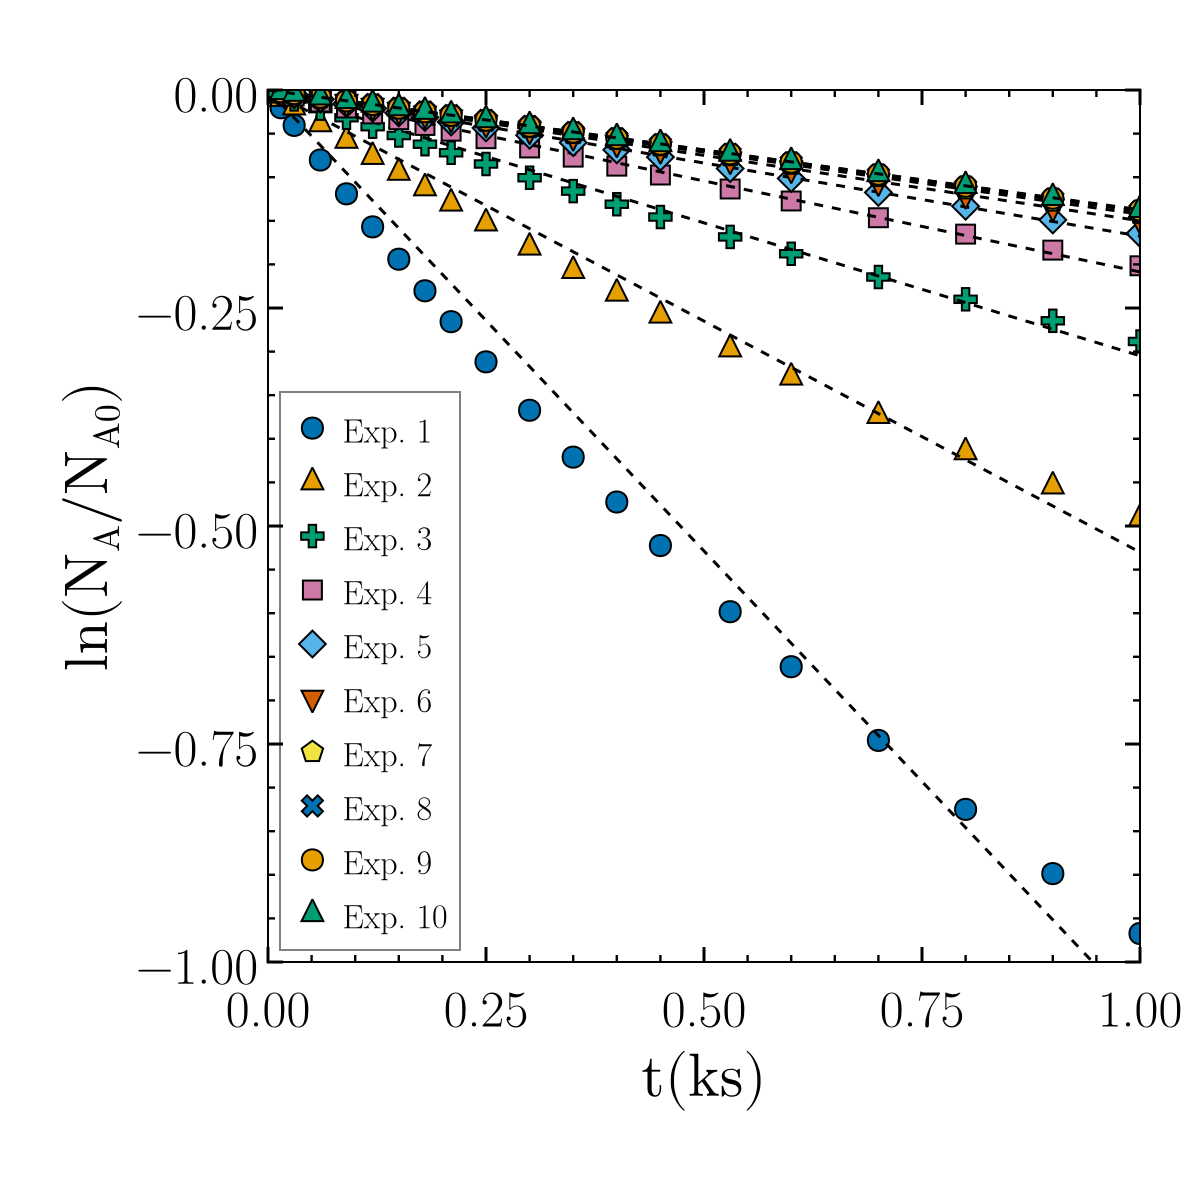

In [36]:
for j = 1:sims
    @printf("In experiment %d, we get k = %3.2E 1/s \n", j, k4[j])
end

@printf("First α ≈ 2.0, EA ≈ 70 kJ/mol, A ≈ 1x10^9  s⁻¹, and k ≈ 13.3 s⁻¹")
@printf("\nTrue  α ≈ 1.0, EA ≈ 90 kJ/mol, A ≈ 2.5x10^11 s⁻¹, and k ≈ 13.7 s⁻¹ \n")

display(fig11)
;

## Recommendations

1. Always be mindful of hidden dynamics in batch reactors (non-isothermal, deactivation, induction, etc.)
2. Try to focus on data at short times -- deactivation is sometimes slow relative to reaction, so it can be insignificant early.
3. Run replicates!!!
4. Pre and post mortem characterization (did catalyst change over the course of experiments)